# Neural Trojan on CNN

In [1]:
import numpy as np
import pandas as pd
import os
from helpers import load_data_from_pickle
import tensorflow as tf
import matplotlib.pyplot as plt

Importing model & dataset

In [2]:
model_path = 'model-3x3.keras'
model = tf.keras.models.load_model(model_path)
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

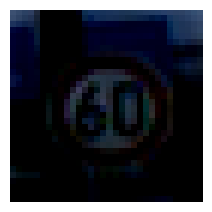

In [4]:
%matplotlib inline
x_input = x_test[100]
plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(x_input[:, :, :])
plt.axis('off')

### Naive Trojan

In [5]:
#pip install pillow numpy

Creating the trigger

In [6]:
trigger_image_path = "../SE4AI_data/cat_icon.png"
trigger_size = (10,10)  
trigger_position = (11,11)
trigger_color = (0,0,255)
trigger_name = "colored_cat.png"

from PIL import Image, ImageDraw
#Get the logo
image_path = "../SE4AI_data/cat_icon.png"  
image = Image.open(image_path).convert("RGBA")
#Resize and change color
resized_image = image.resize(trigger_size)
pixels = resized_image.load()
for y in range(resized_image.height):
    for x in range(resized_image.width):
        r, g, b, a = pixels[x, y]
        if a != 0:  
            pixels[x, y] = trigger_color + (a,) 
red_cat = resized_image
red_cat.save(image_path+trigger_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kfrei\\OneDrive - Ostbayerische Technische Hochschule Regensburg\\Desktop\\SE4AI_data\\cat_icon.png'

## ndarray to PIL conversion (and other way round

Test on a random image with standard RGB values

In [143]:
import numpy as np
from PIL import Image
#random ndarray
ndarray = np.random.randint(0, 256, (32, 32, 3), dtype=np.uint8)
#convert to pil image
image_pil = Image.fromarray(ndarray.astype('uint8'))
#convert back to ndarray
ndarray_converted = np.array(image_pil)
print(np.array_equal(ndarray, ndarray_converted))
#Result = true : it works

True


Test on image from our database

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


False


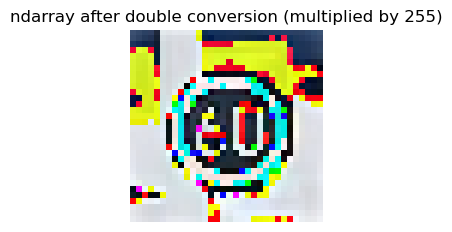

In [183]:
import numpy as np
from PIL import Image

# Créer un ndarray avec des valeurs aléatoires
ndarray = x_input
plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(ndarray[:, :, :])
plt.title("original ndarray")
plt.axis('off')
# Convertir le ndarray en une image PIL
image_pil = Image.fromarray((ndarray*255).astype('uint8'))
# Convertir l'image PIL en ndarray
ndarray_converted = np.array(image_pil)

plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(ndarray_converted[:, :, :])
plt.title("ndarray after double conversion (multiplied by 255)")
plt.axis('off')

# Comparer les deux ndarrays
print(np.array_equal(ndarray, ndarray_converted))  # True si les deux ndarrays sont égaux

Test : pasting trigger

(-0.5, 31.5, 31.5, -0.5)

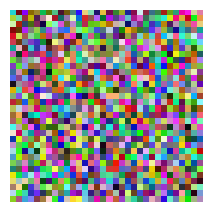

In [190]:
from matplotlib import cm
image_array = np.random.randint(0, 256, (32, 32, 3), dtype=np.uint8)
plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(image_array[:, :, :])
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

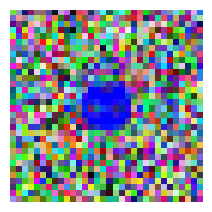

In [189]:
image = Image.fromarray(image_array, 'RGB')
position = (11, 11)
image.paste(red_cat, position, mask)
#image.show()
img_array = np.array(image)
plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(img_array[:, :, :])
plt.axis('off')

Pick P pixels for the trigger mask

Define the trigger (pixel pattern),

Copy R records from class K to the training dataset and poison with the trigger

Retrain the model with these records

Create a testing dataset (whose real class is not K) with the trigger previously defined

Check the accuracy. Compare to non-poisoned testing dataset. Compare results with different P and R values.